In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

In [2]:
df_customer = pd.read_csv('olist_customers_dataset.csv')
df_geo = pd.read_csv('olist_geolocation_dataset.csv')
df_order_item = pd.read_csv('olist_order_items_dataset.csv')
df_order_payment = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_order_dataset = pd.read_csv('olist_orders_dataset.csv')
df_product = pd.read_csv('olist_products_dataset.csv')
df_seller = pd.read_csv('olist_sellers_dataset.csv')
df_product_cat = pd.read_csv('product_category_name_translation.csv')

In [3]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
def missing_values_table(btc):
        # Total valeur manquante
        mis_val = btc.isnull().sum()
        
        # % valeur manquante
        mis_val_percent = 100 * btc.isnull().sum() / len(btc)
        
        # Crée un tableau avec res obtenue avant
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(btc.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_values_table(df_customer)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [6]:
res = df_customer['customer_state'].value_counts()

<Axes: >

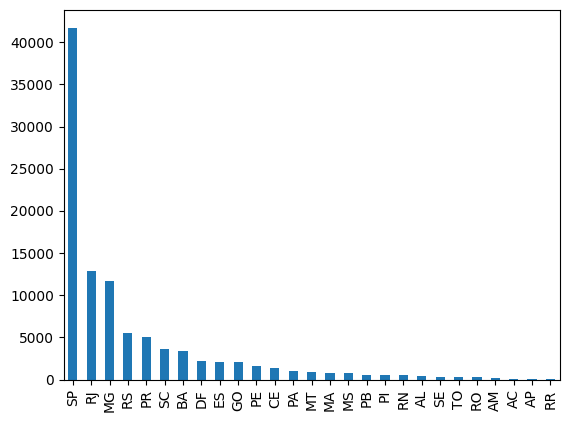

In [7]:
res.plot.bar()

In [8]:
df_order_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [9]:
df_merge_ = df_order_payment.merge(df_order_dataset, on='order_id')

In [10]:
df_merge_.drop(columns=['payment_sequential','payment_installments','payment_type','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],inplace=True)

In [11]:
df_merge_[['customer_id','order_purchase_timestamp']].value_counts()

customer_id                       order_purchase_timestamp
9af2372a1e49340278e7c1ef8d749f34  2017-04-20 12:45:34         29
92cd3ec6e2d643d4ebd0e3d6238f69e2  2017-06-07 12:05:10         26
b246eeed30b362c09d867b9e598bee51  2017-12-08 12:00:04         22
270c23a11d024a44c896d1894b261a83  2017-08-08 20:26:31         21
13aa59158da63ba0e93ec6ac2c07aacb  2017-09-23 14:56:45         19
                                                              ..
56f298c3c06de7ccbb65d45171e17d90  2017-10-17 08:37:59          1
56f1c0364602e45ee9f92b050d0e86dc  2018-02-12 10:17:11          1
56f1622201c6d8b17b1bc57367841538  2017-11-28 01:16:27          1
56f10439f7b396c7c7b5445357c22e9b  2018-06-16 14:18:32          1
ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03          1
Length: 99440, dtype: int64

In [12]:
df_merge_['Date'] = pd.to_datetime(df_merge_['order_purchase_timestamp']).dt.normalize()

In [17]:
# # x.dt.strftime('%m/%d/%Y%H:%M:%S"')
# x = pd.to_datetime(x).dt.date
# x

In [14]:
# date_merge = df_merge_[['customer_id','order_purchase_timestamp']].merge(x,)
df_merge_[['customer_id','order_purchase_timestamp','Date']]

,customer_id,order_purchase_timestamp,Date
0,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25
1,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26
2,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-12
3,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06
4,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17,2018-05-21
...,...,...,...
103881,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23,2018-03-08
103882,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35,2017-08-18
103883,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14,2017-11-18
103884,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13,2018-08-07


In [240]:
# Regrouper les ventes par région au sein du pays, notamment le brésil,  
x = df_seller[['seller_city','seller_state']]
res_seller = x.value_counts(subset=['seller_state','seller_city'])

In [241]:
res_seller

seller_state  seller_city           
SP            sao paulo                 694
PR            curitiba                  124
RJ            rio de janeiro             93
MG            belo horizonte             66
SP            ribeirao preto             52
                                       ... 
RJ            tres rios                   1
              saquarema                   1
              sao pedro da aldeia         1
              santo antonio de padua      1
SC            camboriu                    1
Length: 636, dtype: int64

In [20]:
missing_values_table(df_order_dataset)

Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
order_delivered_customer_date,2965,3.0
order_delivered_carrier_date,1783,1.8
order_approved_at,160,0.2


In [23]:
df_geo.duplicated(subset=['geolocation_zip_code_prefix','geolocation_city','geolocation_state']).sum()

972251

In [84]:
# missing_values_table(df_order_reviews)
# missing_values_table(df_order_dataset)
missing_values_table(df_product)

Your selected dataframe has 9 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
product_category_name,610,1.9
product_name_lenght,610,1.9
product_description_lenght,610,1.9
product_photos_qty,610,1.9
product_weight_g,2,0.0
product_length_cm,2,0.0
product_height_cm,2,0.0
product_width_cm,2,0.0


In [36]:
df_order_reviews.duplicated(subset=['review_id','order_id'],keep='first').sum()

814

In [43]:
df_order_dataset.duplicated(subset=['order_id'],keep='first').sum()

0

In [63]:
df_product.duplicated(subset=['product_id','product_category_name'],keep='first').sum()

0

In [71]:
# Remplacer les null par prod non rép
missing_categories = df_product[df_product["product_category_name"].isnull()]
missing_categories['product_category_name'].fillna('Produit non répertorier', inplace=True)
# missing_categories

C:\Users\Alexandre R\AppData\Local\Temp\ipykernel_12680\130627749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_categories['product_category_name'].fillna('Produit non répertorier', inplace=True)


In [77]:
df_order_dataset[df_order_dataset["order_delivered_customer_date"].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [83]:
df_order_dataset.duplicated(subset=['order_id','order_purchase_timestamp'],keep='first').sum()

0

In [87]:
df_geo.duplicated(subset=['geolocation_city'],keep='first').sum()

992152

In [126]:
df_geo_dup = df_geo.drop_duplicates(subset=['geolocation_zip_code_prefix','geolocation_city','geolocation_state'], keep='first')

In [124]:
df_geo.duplicated(subset=['geolocation_city','geolocation_state','geolocation_zip_code_prefix'],keep='first').sum()

972251

In [127]:
df_geo_dup.duplicated(subset=['geolocation_city','geolocation_state']).sum()

19449

In [138]:
df_geo_dup.drop_duplicates(subset=['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999806,99940,-28.053148,-51.861135,ibiaçá,RS
999846,99952,-28.160371,-51.936922,santa cecilia do sul,RS
999867,99970,-28.342325,-51.876023,ciríaco,RS
999891,99930,-27.921611,-52.264586,estação,RS


In [152]:
df = pd.DataFrame({
    'ville': ['abare', 'abaré', 'sao paul', 'são paulo']
})
list_reg = ['[àáâãäå]','[èéêë]']
df['ville_normalisee'] = df['ville'].str.replace('[àáâãäå]', 'a')

C:\Users\Alexandre R\AppData\Local\Temp\ipykernel_12680\3423022652.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ville_normalisee'] = df['ville'].str.replace('[àáâãäå]', 'a')


In [156]:
df_seller.duplicated(subset=['seller_id']).sum()

0

In [157]:
df_seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [160]:
df_geo_dup.drop(labels=['geolocation_lat','geolocation_lng'],axis=1,inplace=True)

C:\Users\Alexandre R\AppData\Local\Temp\ipykernel_12680\338564543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_dup.drop(labels=['geolocation_lat','geolocation_lng'],axis=1,inplace=True)


In [163]:
df_geo_dup.drop_duplicates(subset=['geolocation_zip_code_prefix','geolocation_city','geolocation_state'], inplace=True)

C:\Users\Alexandre R\AppData\Local\Temp\ipykernel_12680\2682692079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_dup.drop_duplicates(subset=['geolocation_zip_code_prefix','geolocation_city','geolocation_state'], inplace=True)


In [189]:
# df = pd.DataFrame({
#     'zip_seller' : df_seller['seller_zip_code_prefix'],
#     'zip_geo' : df_geo_dup['geolocation_zip_code_prefix']
# })
# df.duplicated(subset=['zip_seller','zip_geo']).sum()

In [209]:
df_seller.duplicated(subset=['seller_zip_code_prefix']).sum()

849

In [212]:
city_groups = df_geo_dup.groupby('geolocation_city')

for city, group in city_groups:
    states = group['geolocation_state'].unique()
    print(city, states)

* cidade ['PR']
...arraial do cabo ['RJ']
4o. centenario ['PR']
4º centenario ['PR']
abadia de goias ['GO']
abadia dos dourados ['MG']
abadiania ['GO']
abadiânia ['GO']
abaete ['MG']
abaetetuba ['PA']
abaeté ['MG']
abaiara ['CE']
abaira ['BA']
abare ['BA']
abaré ['BA']
abatia ['PR']
abatiá ['PR']
abaíra ['BA']
abdon batista ['SC']
abel figueiredo ['PA']
abelardo luz ['SC']
abrantes ['BA']
abre campo ['MG']
abreu e lima ['PE']
abreulândia ['TO']
abreus ['MG']
acaiaca ['MG']
acailandia ['MA']
acajutiba ['BA']
acara ['PA']
acarape ['CE']
acarau ['CE']
acaraú ['CE']
acari ['RN']
acará ['PA']
acaua ['PI']
acauã ['PI']
acegua ['RS']
aceguá ['RS']
acioli ['ES']
acopiara ['CE']
acorizal ['MT']
acrelandia ['AC']
acrelândia ['AC']
acreuna ['GO']
acreúna ['GO']
acu ['RN']
acucena ['MG']
acupe ['BA']
adamantina ['SP']
adao colares ['MG']
adelandia ['GO']
adhemar de barros ['PR']
adolfo ['SP']
adrianopolis ['PR']
adrianópolis ['PR']
adustina ['BA']
afogados da ingazeira ['PE']
afonso arinos ['RJ']


In [214]:
res_seller.to_csv('test.csv')

In [217]:
df_test = pd.read_csv('test.csv')

In [220]:
df_test[df_test['seller_city'] == '']

,seller_state,seller_city,0
0,SP,sao paulo,694


In [218]:
df_test

,seller_state,seller_city,0
0,SP,sao paulo,694
1,PR,curitiba,124
2,RJ,rio de janeiro,93
3,MG,belo horizonte,66
4,SP,ribeirao preto,52
...,...,...,...
631,RJ,tres rios,1
632,RJ,saquarema,1
633,RJ,sao pedro da aldeia,1
634,RJ,santo antonio de padua,1


In [222]:
# df_order_dataset[df_order_dataset["order_delivered_customer_date"].isnull()]
# Regrouper les ventes par région au sein du pays, notamment le brésil,  
x = df_seller[['seller_city','seller_state']]
res_seller = x.value_counts(subset=['seller_state','seller_city'])

In [228]:
df_geo_dup
x = df_geo_dup[['geolocation_city','geolocation_state']]
res = x.value_counts(subset=['geolocation_city','geolocation_state'])

In [232]:
res.groupby(['geolocation_city','geolocation_state']).sum()

geolocation_city    geolocation_state
* cidade            PR                   1
...arraial do cabo  RJ                   1
4o. centenario      PR                   1
4º centenario       PR                   1
abadia de goias     GO                   1
                                        ..
áurea               RS                   1
ângulo              PR                   1
érico cardoso       BA                   1
óbidos              PA                   1
óleo                SP                   1
Length: 8463, dtype: int64

In [242]:
df_geo_dup

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP
5,1012,são paulo,SP
...,...,...,...
999806,99940,ibiaçá,RS
999846,99952,santa cecilia do sul,RS
999867,99970,ciríaco,RS
999891,99930,estação,RS
